In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision import models
from torch.autograd import Variable
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from torch import nn
import torch

In [3]:
from scipy.ndimage.filters import gaussian_filter

In [4]:
resnet = models.resnet50(pretrained=True)

In [5]:
resnet = resnet.eval().cuda()

In [6]:
from util import preprocess_image, recreate_image
def get_blank_img():
    return preprocess_image(np.random.randn(224,224, 3))

In [7]:
childs = list(resnet.children())

In [134]:
to_conv = nn.Sequential(
    *(childs[:5] 
      + list(childs[5].children())[:2] 
      + [list(childs[5].children())[2].conv1]))

In [135]:
# to_conv = resnet.conv1

In [158]:
img = get_blank_img()
filt = 15
eps = 1e-8
for i in range(20):    
    res = to_conv(img)[0,filt]
    objective = res.mean() 
    objective.backward()
    img.grad /= img.grad.std() + eps
    img.data -= img.grad.data
    img = blur(img, 15/(i+1), 12/(i+1))

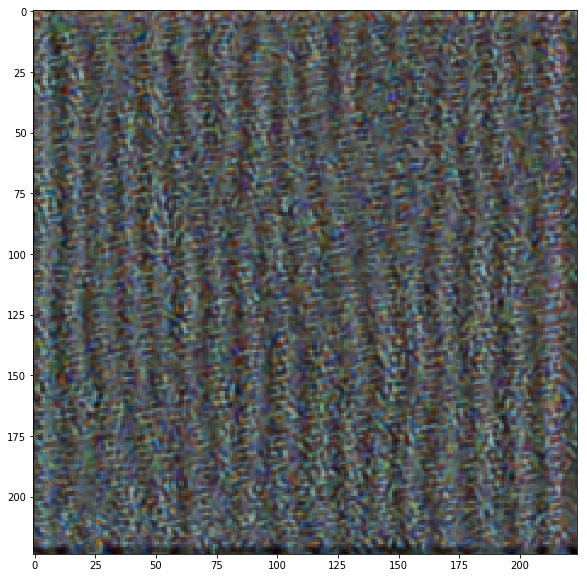

In [159]:
plt.figure(figsize=(10,10))
plt.imshow(recreate_image(img))

In [102]:
def blur(img, sigma, c_sigma):
    out = recreate_image(img)
    out = gaussian_filter(out, [sigma, sigma, c_sigma])
#     out = cv2.bilateralFilter(out, 9, sigma, sigma)
    return preprocess_image(out)

In [13]:
import cv2

In [16]:
im = recreate_image(img)

In [67]:
cv2.bilateralFilter?

Docstring:
bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
.   @brief Applies the bilateral filter to an image.
.   
.   The function applies bilateral filtering to the input image, as described in
.   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
.   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
.   very slow compared to most filters.
.   
.   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
.   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
.   strong effect, making the image look "cartoonish".
.   
.   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
.   applications, and perhaps d=9 for offline applications that need heavy noise filtering.
.   
.   This filter does not work inplace.
.   @param src Source 8-bit or